

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.
So we are going to investigate this data set to answer thr following questions.

1. Which genres are most popular over the years?
2. Are the movies with high revenue have high vote average?
3. Are there relationship between budget and revenue?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

>In this section, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.
### General Properties

In [2]:
# First we need to load the csv data file
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Now we can wrangle our data to clean it and prepare for the analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can see that there are some columns (id, imbd_id, homepage, tagline, keywords, overview and release_date) that won't be useful in our analysis so we are goning to drop them

In [4]:
# we can see that there are null values in more than one column
pd.isna(df).sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

These null values considered as missing data so we gonna drop all of them 

In [5]:
# let's see describtion for our data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As we can see that about 50% of the budget and revenue values are zeros and that couldn't be possible so we will consider it missing data and drop all zero values from budget and revenue columns

Now we are ready to start cleaning our data!


### Data Cleaning

In [6]:
# Dropping id, imbd_id, homepage, tagline, keywords and overview columns
df.drop(['id', 'imdb_id', 'homepage','tagline', 'keywords', 'release_date' ,'overview',], axis=1,  inplace=True)

In [7]:
# let's check our data again after dropping unnecessary columns and changing datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 976.3+ KB


In [8]:
# Here we will drop all null values
df.dropna(inplace=True)

In [9]:
# Recheck
pd.isna(df).sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

So now there are no null values!

In [10]:
# Dropping zero values from budget and revenue columns
df = df[df.budget != 0]
df = df[df.revenue != 0]

In [11]:
# Let's check  now the data description
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3806.000000,3.806000e+03,3.806000e+03,3806.000000,3806.000000,3806.000000,3806.000000,3.806000e+03,3.806000e+03
mean,1.203625,3.760600e+07,1.089450e+08,109.346558,534.047556,6.170257,2001.231477,4.471590e+07,1.386797e+08
std,1.480407,4.231641e+07,1.772829e+08,19.845063,883.668197,0.792560,11.329019,4.488171e+07,2.169803e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470673,1.000000e+07,1.429262e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.923514e+07
50%,0.810226,2.500000e+07,4.620904e+07,106.000000,208.500000,6.200000,2004.000000,3.038360e+07,6.283467e+07
75%,1.387058,5.000000e+07,1.260625e+08,119.000000,584.000000,6.700000,2010.000000,6.083489e+07,1.657273e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
# Now we take a look again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3806 non-null   float64
 1   budget                3806 non-null   int64  
 2   revenue               3806 non-null   int64  
 3   original_title        3806 non-null   object 
 4   cast                  3806 non-null   object 
 5   director              3806 non-null   object 
 6   runtime               3806 non-null   int64  
 7   genres                3806 non-null   object 
 8   production_companies  3806 non-null   object 
 9   vote_count            3806 non-null   int64  
 10  vote_average          3806 non-null   float64
 11  release_year          3806 non-null   int64  
 12  budget_adj            3806 non-null   float64
 13  revenue_adj           3806 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 371.7+ KB


So after cleaning the missing data we have 3806 movies ready to answer our quesions!

<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned your data, we're ready to move on to exploration. 

### Research Question 1 (Which genres are most popular over the years?)

In [13]:
# Viewing our data
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10822                                        Drama
10828                             Mystery|Thriller
10829                               Action|Western
10835           Action|Adventure|Drama|War|Romance
10848                    Adventure|Science Fiction
Name: genres, Length: 3806, dtype: object

We can see that each movie has more than one genre so we need to split them to different data frame using the release_year as index

In [15]:
genre_list = pd.DataFrame(df.genres.str.split("|").to_list(), index=df.release_year).stack()
genre_list = genre_list.reset_index(["release_year"])
genre_list.columns = ["release_year", "genres"]

Source is : https://www.geeksforgeeks.org/convert-list-like-column-elements-to-separate-rows-in-pandas/

In [16]:
genre_list

,release_year,genres
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction
3,2015,Thriller
0,2015,Action
...,...,...
2,1966,Drama
3,1966,War
4,1966,Romance
0,1966,Adventure


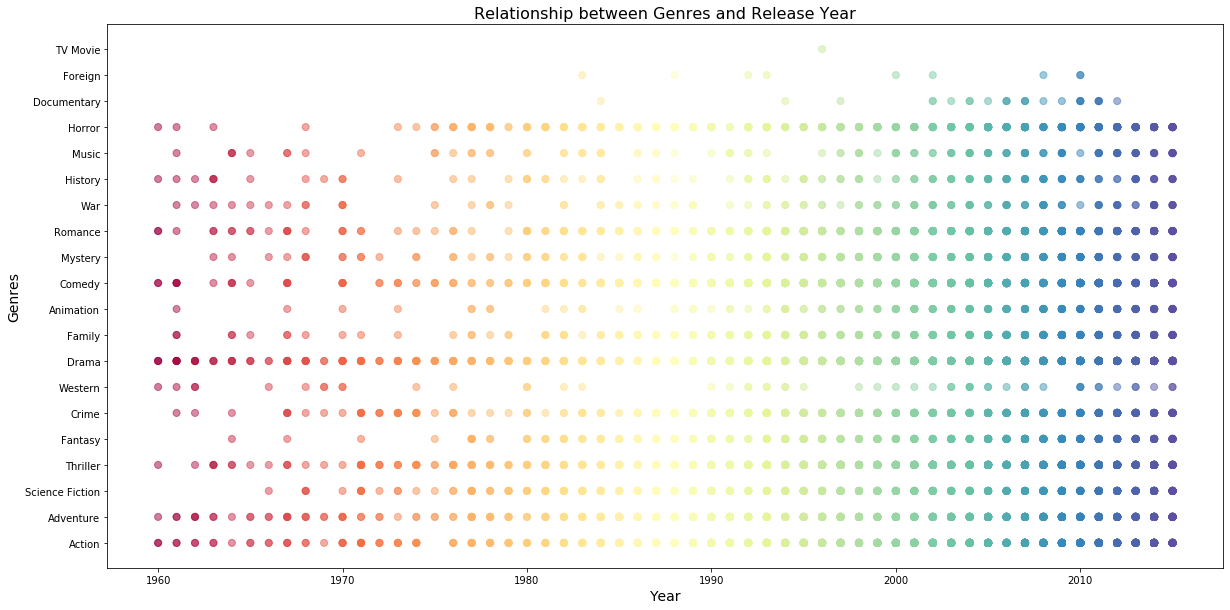

In [17]:
# Using scatter plot to determine the relationship between genres and release_year 
fig = plt.figure(figsize = (20, 10))
cmap = cm.get_cmap('Spectral')
colours = genre_list['release_year']
markers = 50
plt.scatter(genre_list['release_year'], genre_list['genres'],  c = colours, s = markers, cmap = cmap, alpha =0.5)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Genres', fontsize = 14)
plt.title('Relationship between Genres and Release Year', fontsize = 16)
plt.show();


The figure above shows that the number of genres increased over the years, for example Documentary movies did not start to appear till the late 90s.
Also the all time common geners are Action, Adventure, Drama and Romance.

### Research Question 2  (Are the movies with high revenue have high vote average?)

Text(0.5, 0, 'Vote Average')

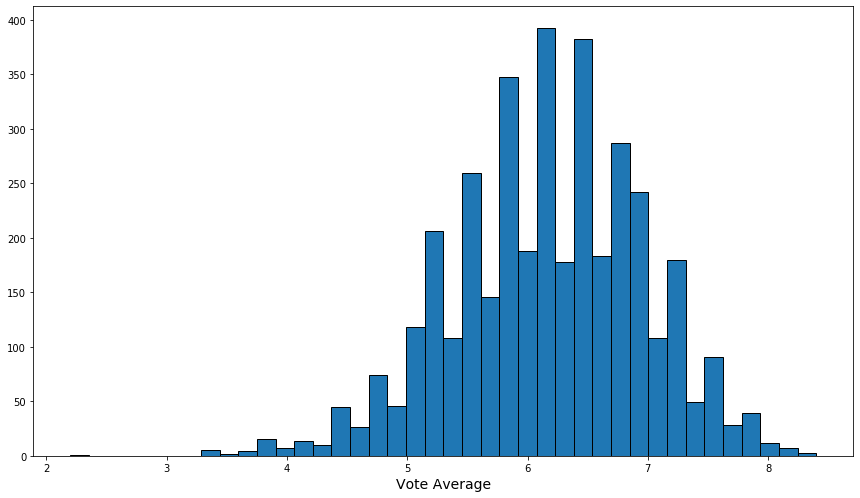

In [18]:
# First we will explore vote_average behavior using histogram
df['vote_average'].hist(grid = False, bins = 40, edgecolor= 'black', figsize=[14.70, 8.27]);
plt.xlabel('Vote Average', fontsize = 14)

The majority of vote average are high

In [19]:
# Defining function for scatter plot.

def my_scatter_plot(df,xVar,yVar):
    #plot
    df.plot.scatter(x=xVar, y=yVar, figsize=[14.7, 8.27]);
    #plot title and its format
    plt.title(f'Relationship between {xVar} and {yVar}'.title(), 
             fontsize = 14, weight = "bold")
    # x Label and format
    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
    # y Label and format
    plt.ylabel(yVar.title(), fontsize = 10, weight = "bold")

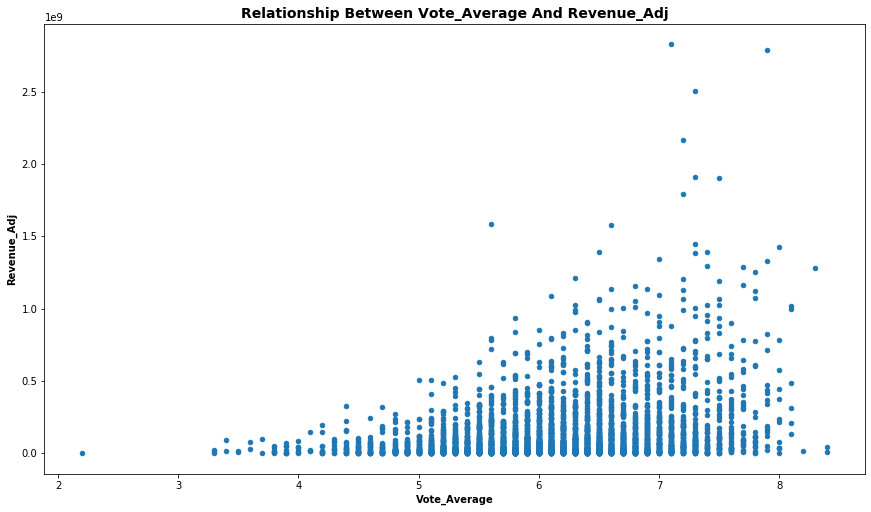

In [20]:
# Using my_scatter_plot function to find relationship between vote_average & revenue_adj
my_scatter_plot(df,'vote_average', 'revenue_adj')

The figure above shows that most of the high revenue movies have high voting average, however there are low revenue movies that also have high votings.

### Research Question 3 (Are there relationship between budget and revenue?)

Text(0.5, 1.0, 'Relationship between Release year and Revenue')

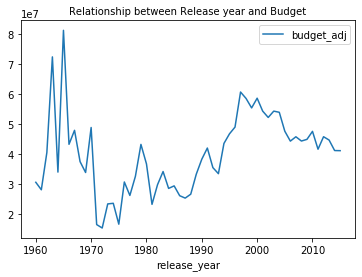

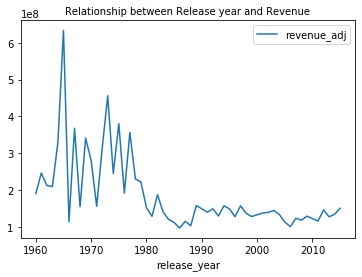

In [21]:
#Here we will explore the behavior of both budget and revenue over time
# Get average revenue and budget
meanBandR=df.groupby('release_year',as_index=False)[['revenue_adj', 'budget_adj']].mean()
meanBandR.plot(x = 'release_year', y = 'budget_adj')
plt.title('Relationship between Release year and Budget',fontsize = 10)
meanBandR.plot(x = 'release_year', y = 'revenue_adj')
plt.title('Relationship between Release year and Revenue',fontsize = 10)

We can say that movies budget increased over the years.
However revenue decreased.

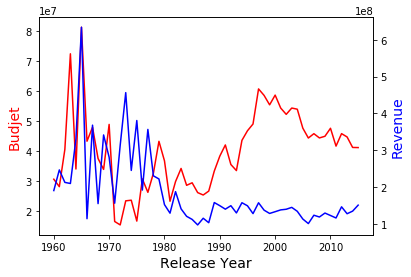

In [22]:
# Will combine the budget and revenue together to compare them over the years
fig,ax = plt.subplots()
ax.plot(meanBandR['release_year'], meanBandR['budget_adj'], color='red')
ax.set_xlabel('Release Year',fontsize=14)
ax.set_ylabel('Budjet',color='red',fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(meanBandR['release_year'], meanBandR['revenue_adj'],color='blue')
ax2.set_ylabel('Revenue',color='blue',fontsize=14)
plt.show()

Source : https://stackoverflow.com/questions/55847933/how-to-plot-two-variables-on-two-different-y-axes-in-python

While movies budjet seems to increase over the years, the revenue seems to decrease

In [23]:
# Subtracting the budget from revenue to evaluate movies income.
df['income'] = df['revenue_adj'] - df['budget_adj']
df['income']

0        1.254446e+09
1        2.101614e+08
2        1.704191e+08
3        1.718723e+09
4        1.210949e+09
             ...     
10822    1.762585e+08
10828    6.718015e+07
10829    9.049166e+06
10835    5.374412e+07
10848    4.625353e+07
Name: income, Length: 3806, dtype: float64

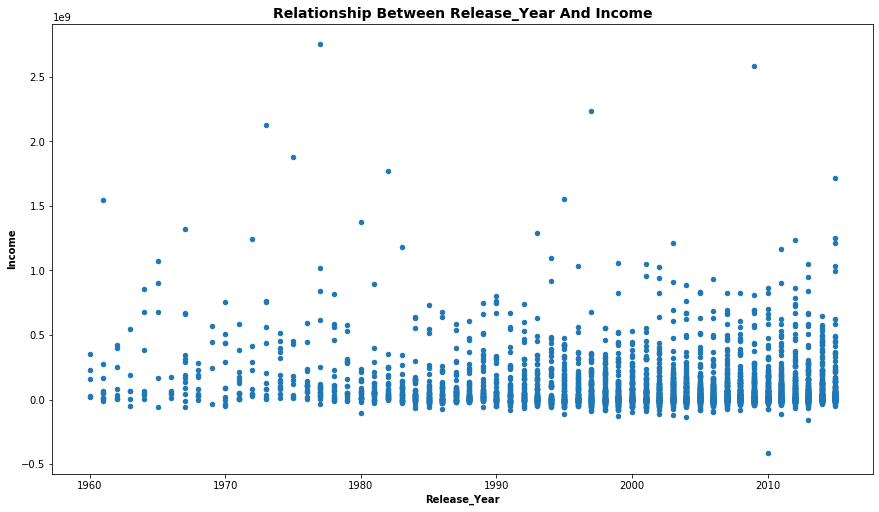

In [24]:
# Using my_scatter_plot function to find relationship between release_year & income
my_scatter_plot(df, 'release_year', 'income')

There are some movies that have very low income, somtimes negative too.

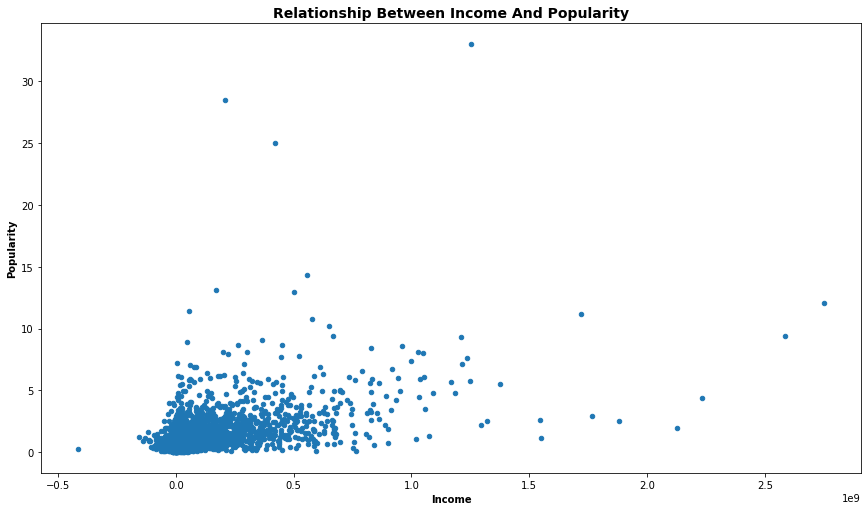

In [25]:
# Using my_scatter_plot function to find relationship between popularity and income
my_scatter_plot(df, 'income', 'popularity')

Seems that most of the time not popular movies have low income

<a id='conclusions'></a>
## Conclusions


This analysis does not imply any statistical conclusions it just gives us some insight to changes in movies industry over the years.

So we are going to summarize our analysis as following:

1. New movie genres started to appear over the years but the most popular genres are: Action, Adventure, Drama and Romance
2. High vote average does not necessarily mean high revenue, some movies have very high voting average with very low revenue. However, high revenue movies tend to have high voting average.
3. Budgets seems to be increasing overtime, Revenue is decreasing over time.
4. Most of the time the not so popular movies have low income.
  